## Monte Carlo #1

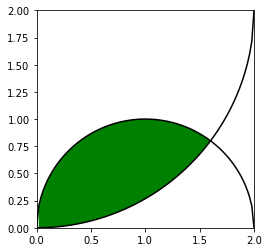

In [20]:
%matplotlib inline
import math
from random import random
import matplotlib.pyplot as plt
import numpy as np
#Graph the function  (Code taken from assignment)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')

x1 = np.linspace(0,2,100)
y1 = np.sqrt(1-(x1-1)**2)
ax1.plot(x1,y1,'k')

y2 = 2-np.sqrt(4-x1**2)
ax1.plot(x1,y2,'k')

ax1.set_xlim(0,2)
ax1.set_ylim(0,2)
ax1.fill_between(x1, y1, y2, where=y1>y2, facecolor='green')
plt.show()


#Define funciton
def f1(x):
    return np.sqrt(1-(x-1)**2)
def f2(x):
    return 2-np.sqrt(4-x**2)
#Integration method (intersection point found to be 1.6)
def MC1(N):
    count = 0
    for i in range(N):
        x = 1.6*random()
        y = random()
        if (y<f1(x)) & (y>f2(x)):
            count += 1
    I = 1.6*count/N
    return I

def variance(n):

    MC1_values =[]
    for i in range(100):
        MC1_values.append(MC1(n))
    plt.plot(MC1_values,"." ,label = n)
    mean = sum(MC1_values)/100
    var = 0
    plt.legend()
    for j in range(100):
        var += ((MC1_values[j]-mean)**2)
    return (var/100)


0.0056107775999999976
0.0006232104960000006
5.649023743999998e-05
6.984030080000006e-06


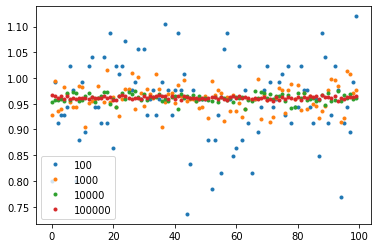

In [21]:
print(variance(100))
print(variance(1000))
print(variance(10000))
print(variance(100000))

## Important sampling
As a preface, Stanley Barronet's HW on this topic helped through the understanding of this problem and the general application of important sampling in code. 

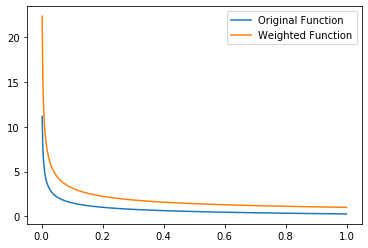

In [29]:
%matplotlib inline
from random import random
import matplotlib.pyplot as plt
import numpy as np
#we define out functions (the weighted function is given by the problem)
def f(x):
    return 1/np.sqrt(x)/(np.exp(x)+1)
def w(x):
    return 1/np.sqrt(x)

#Graph our functions 
x = np.linspace(0,1,500)
plt.plot(x[1:], f(x[1:]),label='Original Function') #We take out the first '0' term to get a plot 
plt.plot(x[1:], w(x[1:]),label='Weighted Function') #and to fit the domain of the fuctions
plt.legend()

Now we need to find the probability function defined as:
$$ p(x) = \frac{w(x)}{\int_a^b w(x)dx} $$
with $w(x) = x^{-1/2}$, we find $ {\int_a^b w(x)dx} = 2 $ 
,therefore $$p(x) = .5*x^{-1/2}$$

The cumulative distribution function $F(x)$ is defined as: $$F(x)=\int_0^x p(x)dx=x^{1/2}$$

Therefore,the inverse of cumulative distribution function is: $F^{-1}(x)= x^2$

We will use $F^{-1}(x)$ to generate $\frac{f(x_i)}{w(x_i)}$ points in:
$$ I \approx  \frac{1}{N} \sum_{i=1}^{N} \frac{f(x_i)}{w(x_i)} \int_a^b w(x)dx$$



In [56]:
from scipy.integrate import quad

def Importantsampling(f, w, F_inv, a, b, N):
    """
    Calculate and return the integral of 'f', on the interval
    'x_start' and 'x_end', using the Monte Carlo method with
    importance sampling, with weighting function 'w', inverse
    transform sampling function 'F_inv', and 'N' random points.
    """
    #we find the intergral of the weighted function using the quad method 
   # intgralw = quad(w, a, b)[0]
    #find the width of our domain in order to create random points within our domain of interest
    width = b - a
    I = 0
    
    for i in range(N):
        #generate random points within our domain
        integralw = quad(w, a, b)[0]
        x = width*random() + a
        y = F_inv(x)
        I += f(y)/w(y)
        
    return I/N*integralw

Now to test our problem we have:
$$f(x)=\frac{x^{-1/2}}{e^x + 1}$$

$$w(x) = x^{-1/2}$$

$$F^{-1}(x)= x^2$$

In [66]:
def f(x):
    return 1/np.sqrt(x)/(np.exp(x)+1)
def w(x):
    return 1/np.sqrt(x)
def F_inv(x): 
    return x**2
print ('I is approx:', Importantsampling(f, w, F_inv, 0, 1, 10000))
print ('Scipy reference:', quad(f,0,1)[0])
error = np.abs((quad(f,0,1)[0]-Importantsampling(f, w, F_inv, 0, 1, 10000)))/quad(f,0,1)[0]
print ('Percent error:', error*100 ,'%')

I is approx: 0.8399491155924618
Scipy reference: 0.8389329600133838
Percent error: 0.0012343544819191012 %
